Kelompok 5 - Kelas B
---
* Safira Ramadhani - 2206026656
* Gian Sinar Katulistiwa - 2206031675
* Renata Shaula Alfino Ritonga - 2206815812
* Golda Aurelia Silalahi - 2206826173
* Amira Shohifa - 2206829130

##Import Module

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

##Load Data

In [ ]:
#Melakukan load data
data = pd.read_csv('/content/insurance_asli.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,0rthwest,21984.47061
4,32,male,28.880,0,0,0rthwest,3866.85520


In [ ]:
#Melihat 5 data terakhir
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,0,0rthwest,10600.5483
1334,18,female,31.92,0,0,0rtheast,2205.9808
1335,18,female,36.85,0,0,southeast,1629.8335
1336,21,female,25.80,0,0,southwest,2007.9450
1337,61,female,29.07,0,1,0rthwest,29141.3603


##Informasi Data

In [ ]:
#Melihat tipe data, missing values, dan jumlah entri dari masing-masing variabel
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


Dapat dilihat, datanya lengkap, tidak ada missing values.

Didapatkan juga dari data terdapat 1338 subjek dengan 7 variabel, yakni =
0. age (tipe data : int)
1. sex (tipe data : object)
2. bmi (tipe data : float)
3. children (tipe data : int)
4. smoker (tipe data : object)
5. region (tipe data : object)
6. charges (tipe data :    float)                          

Keterangan : Variabel Respon adalah Charges

In [ ]:
#Melihat statistik deskriptif dari variabel numerik
data.describe()

,age,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,0.204783,13270.422265
std,14.049960,6.098187,1.205493,0.403694,12110.011237
min,18.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,53.130000,5.000000,1.000000,63770.428010


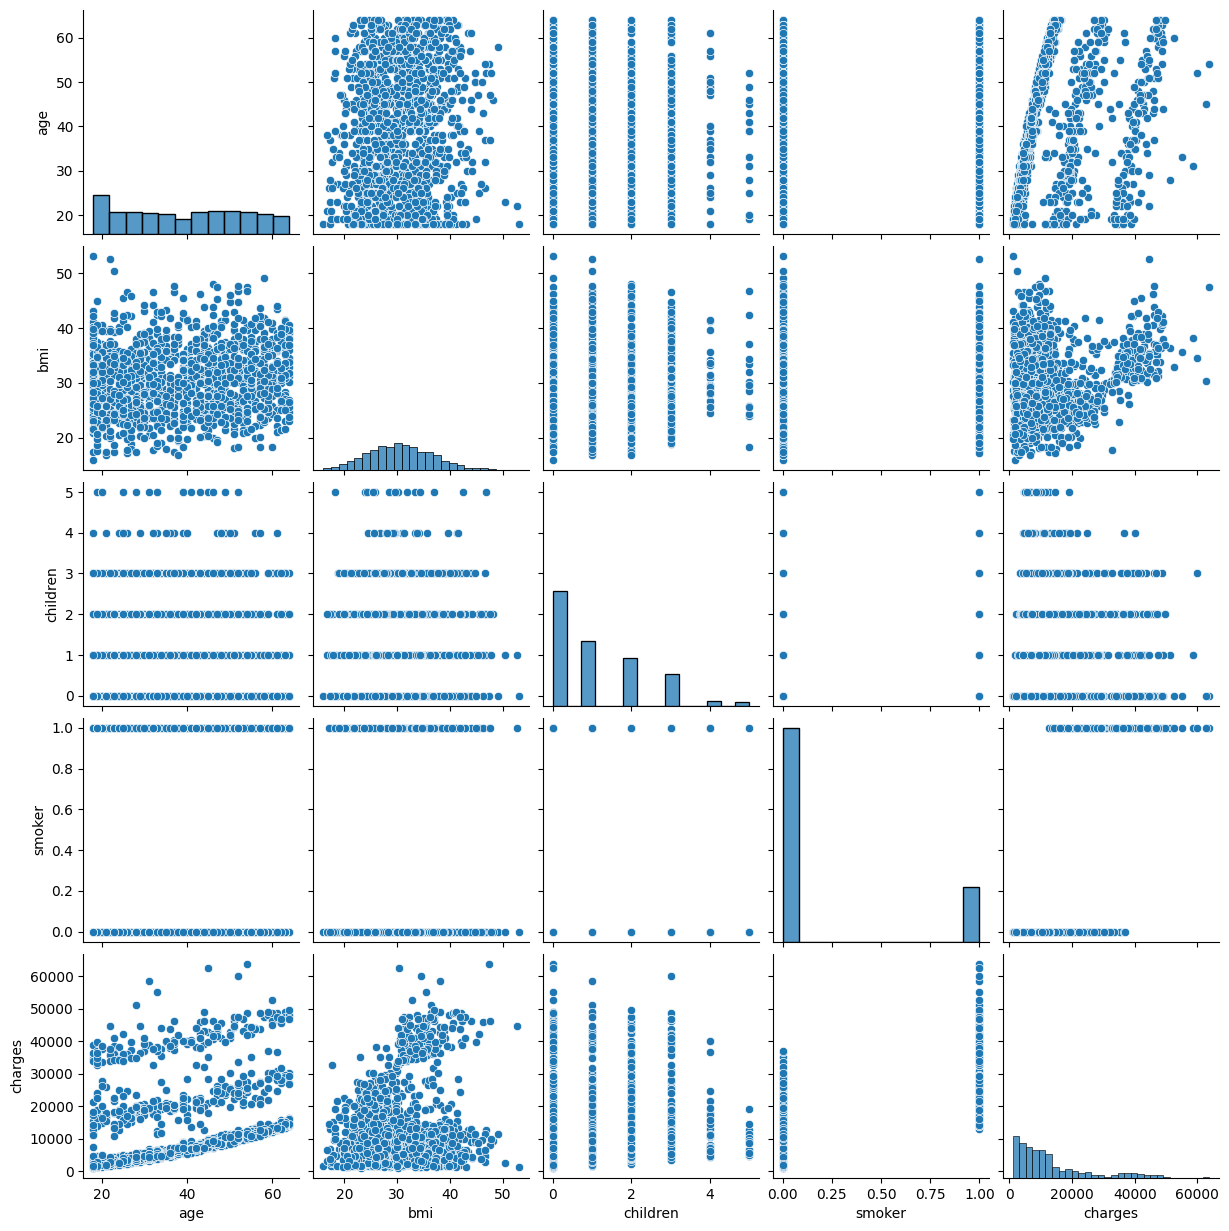

In [ ]:
#Melihat bentuk visualisasi pairplot dari data
sns.pairplot(data)

<Axes: xlabel='charges', ylabel='Count'>

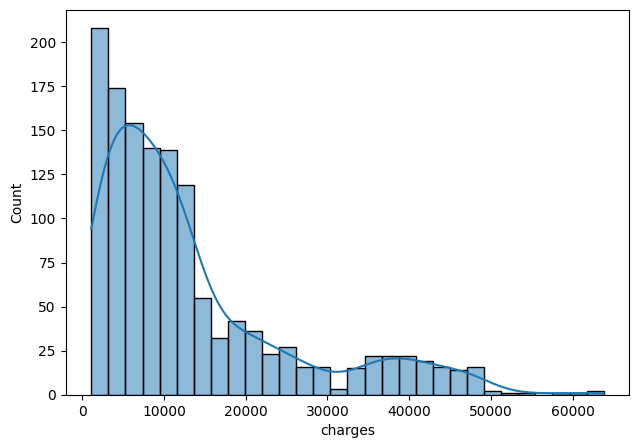

In [ ]:
#Melihat histogram dari kuantitas setiap nilai-nilai 'charges'
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.histplot(data["charges"], kde=True)

In [ ]:
data_sample = data

##Mengecek Outliers Variabel Numerik



*   Charges



<Axes: xlabel='charges'>

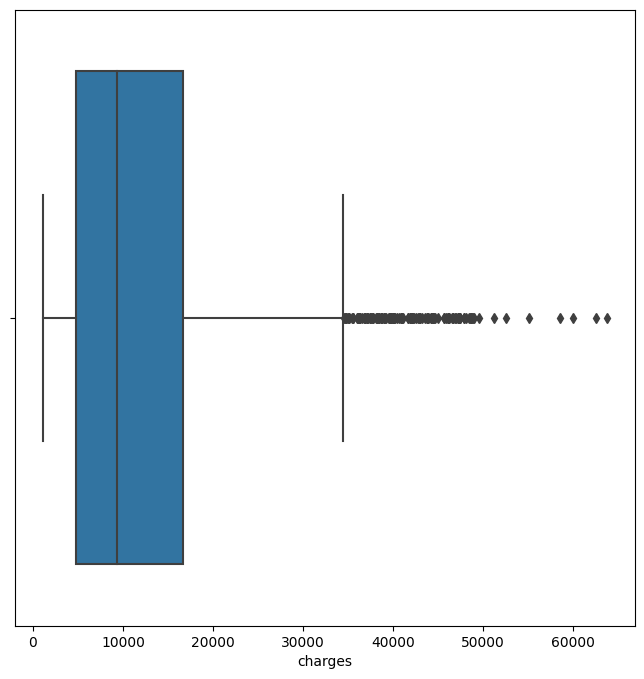

In [ ]:
#Membuat grafik boxplot untuk kolom 'charges' dengan tujuan melihat keberadaan outliers
plt.figure(figsize=(8,8))
sns.boxplot(x='charges', data=data_sample)

In [ ]:
#Akan dicek outliers dari kolom charges
kolom_charges = data_sample['charges']

#Akan dihitung mean dan standar deviasi dari kolom charges
mean = kolom_charges.mean()
std_dev = kolom_charges.std()

# Akan dihitung batas atas dan batas bawah outlier menggunakan metode IQR
Q1 = kolom_charges.quantile(0.25)
Q3 = kolom_charges.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = kolom_charges[(kolom_charges < lower_bound) | (kolom_charges > upper_bound)]

print("Nilai-nilai Outlier:")
print(outliers)

Nilai-nilai Outlier:
14      39611.75770
19      36837.46700
23      37701.87680
29      38711.00000
30      35585.57600
           ...     
1300    62592.87309
1301    46718.16325
1303    37829.72420
1313    36397.57600
1323    43896.37630
Name: charges, Length: 139, dtype: float64




*   BMI



<Axes: xlabel='bmi'>

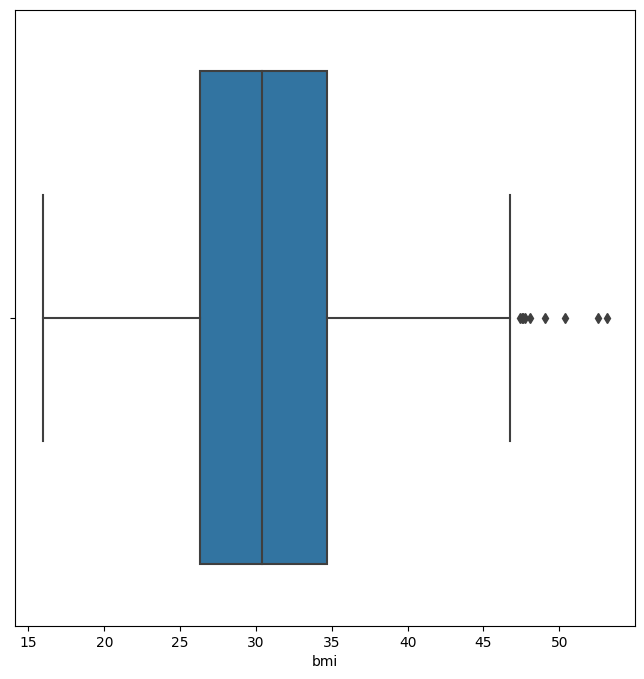

In [ ]:
#Membuat grafik boxplot untuk kolom 'bmi' dengan tujuan melihat keberadaan outliers
plt.figure(figsize=(8,8))
sns.boxplot(x='bmi', data=data_sample)

In [ ]:
#Akan dicek outliers dari kolom bmi
kolom_bmi = data_sample['bmi']

#Akan dihitung mean dan standar deviasi dari kolom bmi
mean = kolom_bmi.mean()
std_dev = kolom_bmi.std()

#Akan dihitung batas atas dan batas bawah outlier menggunakan metode IQR
Q1 = kolom_bmi.quantile(0.25)
Q3 = kolom_bmi.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = kolom_bmi[(kolom_bmi < lower_bound) | (kolom_bmi > upper_bound)]

print("Nilai-nilai Outlier:")
print(outliers)

Nilai-nilai Outlier:
116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64




*   Age



<Axes: xlabel='age'>

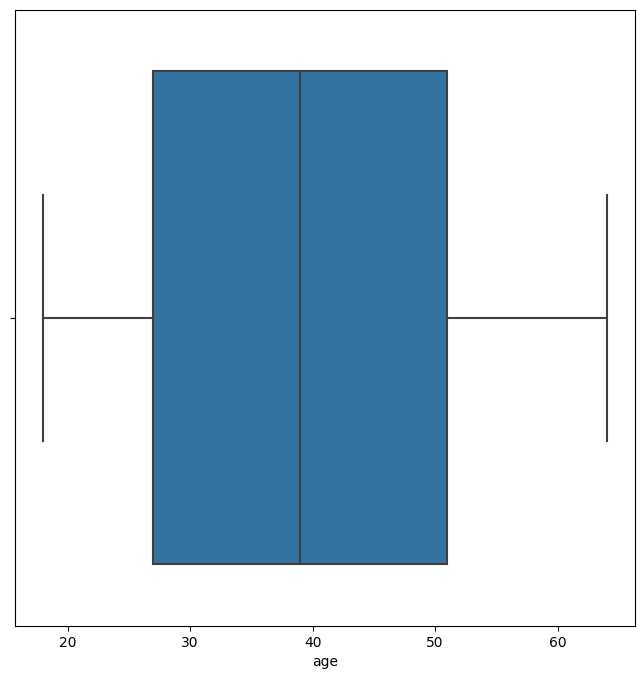

In [ ]:
#Membuat grafik boxplot untuk kolom 'age' dengan tujuan melihat keberadaan outliers
plt.figure(figsize=(8,8))
sns.boxplot(x='age', data=data_sample)

In [ ]:
# kan dicek outliers dari kolom age
kolom_age = data_sample['age']

#Akan dihitung mean dan standar deviasi dari kolom age
mean = kolom_age.mean()
std_dev = kolom_age.std()

#Akan dihitung batas atas dan batas bawah outlier menggunakan metode IQR
Q1 = kolom_age.quantile(0.25)
Q3 = kolom_age.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = kolom_age[(kolom_age < lower_bound) | (kolom_age > upper_bound)]

print("Nilai-nilai Outlier:")
print(outliers)

Nilai-nilai Outlier:
Series([], Name: age, dtype: int64)




*   Children



<Axes: xlabel='children'>

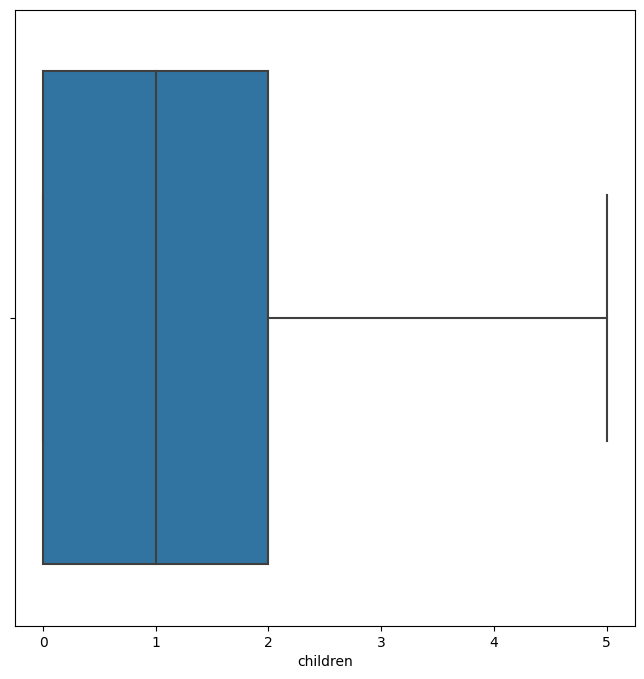

In [ ]:
#Membuat grafik boxplot untuk kolom 'children' dengan tujuan melihat keberadaan outliers
plt.figure(figsize=(8,8))
sns.boxplot(x='children', data=data_sample)

In [ ]:
#Akan dicek outliers dari kolom children
kolom_children = data_sample['children']

#Akan dihitung mean dan standar deviasi dari kolom children
mean = kolom_children.mean()
std_dev = kolom_children.std()

#Akan dihitung batas atas dan batas bawah outlier menggunakan metode IQR
Q1 = kolom_children.quantile(0.25)
Q3 = kolom_children.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = kolom_children[(kolom_children < lower_bound) | (kolom_children > upper_bound)]

print("Nilai-nilai Outlier:")
print(outliers)

Nilai-nilai Outlier:
Series([], Name: children, dtype: int64)


Dapat dilihat bahwa pada variabel charges dan variabel bmi memiliki outliers. Untuk variabel numerik age dan children tidak terdapat outliers.

Selanjutnya, akan dihilangkan outliers pada variabel charges dan variabel bmi.

##Menghilangkan Outliers



*   Charges



In [ ]:
# Menghitung IQR untuk variabel charges
Q1 = data_sample['charges'].quantile(0.25)
Q3 = data_sample['charges'].quantile(0.75)
IQR = Q3 - Q1

# Membuat filter untuk menghilangkan outlier
outlier_filter = ((data_sample['charges'] < (Q1 - 1.5 * IQR)) | (data_sample['charges'] > (Q3 + 1.5 * IQR)))

# Menghilangkan baris yang memiliki outlier
data_no_outliers = data_sample[~outlier_filter]

<Axes: xlabel='charges'>

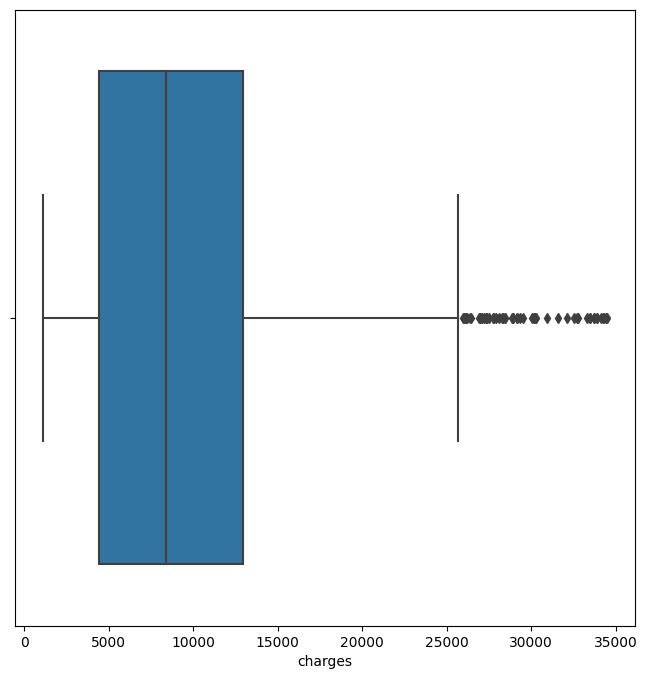

In [ ]:
#Membuat grafik boxplot untuk kolom 'charges' dengan tujuan melihat keberadaan outliers setelah dihapus
plt.figure(figsize=(8,8))
sns.boxplot(x='charges', data=data_no_outliers)

In [ ]:
#Akan dicek outliers dari kolom charges
kolom_charges = data_no_outliers['charges']

#Akan dihitung mean dan standar deviasi dari kolom charges
mean = kolom_charges.mean()
std_dev = kolom_charges.std()

# Akan dihitung batas atas dan batas bawah outlier menggunakan metode IQR
Q1 = kolom_charges.quantile(0.25)
Q3 = kolom_charges.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_kedua = kolom_charges[(kolom_charges < lower_bound) | (kolom_charges > upper_bound)]

print("Nilai-nilai Outlier:")
print(outliers_kedua)

Nilai-nilai Outlier:
9       28923.13692
11      27808.72510
57      34303.16720
62      30166.61817
92      30184.93670
103     30942.19180
115     30259.99556
128     32734.18630
138     27322.73386
140     27375.90478
244     29523.16560
259     33750.29180
289     25992.82104
379     27000.98473
387     30284.64294
419     28950.46920
443     28287.89766
444     26109.32905
475     28868.66390
503     32548.34050
516     27724.28875
539     27346.04207
573     31620.00106
599     33471.97189
618     34439.85590
641     32787.45859
658     26392.26029
664     27037.91410
688     26236.57997
696     29186.48236
770     27941.28758
806     28476.73499
843     27533.91290
876     26140.36030
886     27218.43725
890     29330.98315
911     33732.68670
936     32108.66282
959     28468.91901
964     26467.09737
987     28340.18885
1001    34472.84100
1019    26018.95052
1042    33475.81715
1093    33907.54800
1120    34166.27300
1142    27117.99378
1196    33307.55080
1223    26125.67477

In [ ]:
# Menghitung IQR untuk variabel charges
Q1 = data_no_outliers['charges'].quantile(0.25)
Q3 = data_no_outliers['charges'].quantile(0.75)
IQR = Q3 - Q1

# Membuat filter untuk menghilangkan outlier
outlier_filter_2 = ((data_no_outliers['charges'] < (Q1 - 1.5 * IQR)) | (data_no_outliers['charges'] > (Q3 + 1.5 * IQR)))

# Menghilangkan baris yang memiliki outlier
data_no_outliers_2 = data_no_outliers[~outlier_filter_2]

<Axes: xlabel='charges'>

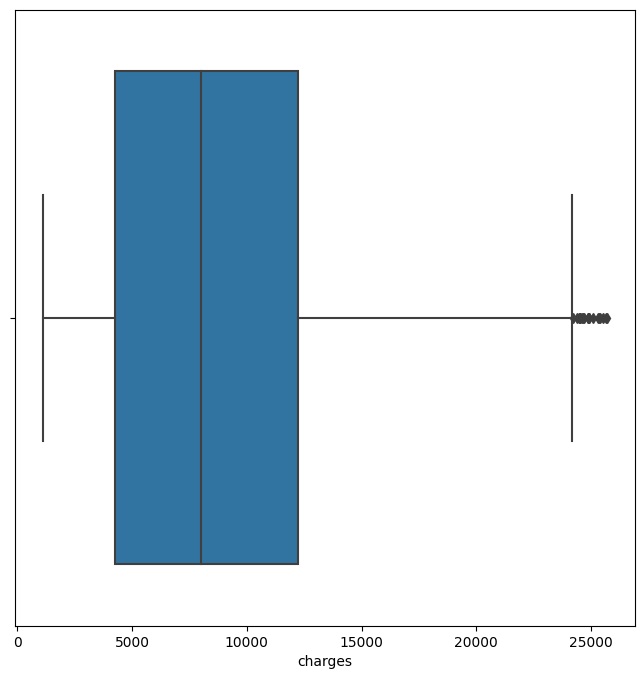

In [ ]:
#Membuat grafik boxplot untuk kolom 'charges' dengan tujuan melihat keberadaan outliers setelah dihapus
plt.figure(figsize=(8,8))
sns.boxplot(x='charges', data=data_no_outliers_2)

In [ ]:
#Akan dicek outliers dari kolom charges
kolom_charges = data_no_outliers_2['charges']

#Akan dihitung mean dan standar deviasi dari kolom charges
mean = kolom_charges.mean()
std_dev = kolom_charges.std()

# Akan dihitung batas atas dan batas bawah outlier menggunakan metode IQR
Q1 = kolom_charges.quantile(0.25)
Q3 = kolom_charges.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_ketiga = kolom_charges[(kolom_charges < lower_bound) | (kolom_charges > upper_bound)]

print("Nilai-nilai Outlier:")
print(outliers_ketiga)

Nilai-nilai Outlier:
219     25081.76784
227     24227.33724
245     24476.47851
262     24869.83680
301     24873.38490
321     24671.66334
331     24393.62240
355     24603.04837
474     25382.29700
491     24513.09126
520     25656.57526
607     25678.77845
637     24915.04626
655     24667.41900
783     24520.26400
925     25333.33284
980     25517.11363
1007    24915.22085
1053    25309.48900
1281    24535.69855
Name: charges, dtype: float64


In [ ]:
# Menghitung IQR untuk variabel charges
Q1 = data_no_outliers_2['charges'].quantile(0.25)
Q3 = data_no_outliers_2['charges'].quantile(0.75)
IQR = Q3 - Q1

# Membuat filter untuk menghilangkan outlier
outlier_filter_3 = ((data_no_outliers_2['charges'] < (Q1 - 1.5 * IQR)) | (data_no_outliers_2['charges'] > (Q3 + 1.5 * IQR)))

# Menghilangkan baris yang memiliki outlier
data_no_outliers_3 = data_no_outliers_2[~outlier_filter_3]

<Axes: xlabel='charges'>

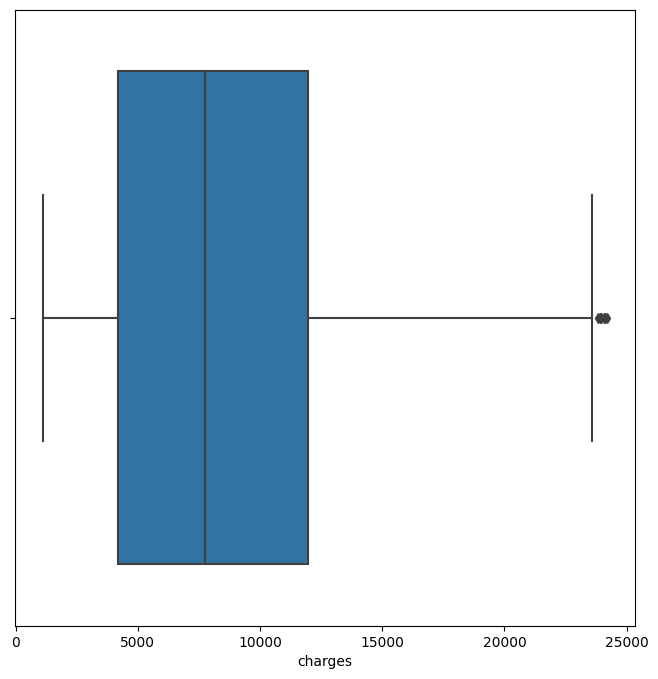

In [ ]:
#Membuat grafik boxplot untuk kolom 'charges' dengan tujuan melihat keberadaan outliers setelah dihapus
plt.figure(figsize=(8,8))
sns.boxplot(x='charges', data=data_no_outliers_3)

In [ ]:
#Akan dicek outliers dari kolom charges
kolom_charges = data_no_outliers_3['charges']

#Akan dihitung mean dan standar deviasi dari kolom charges
mean = kolom_charges.mean()
std_dev = kolom_charges.std()

# Akan dihitung batas atas dan batas bawah outlier menggunakan metode IQR
Q1 = kolom_charges.quantile(0.25)
Q3 = kolom_charges.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_keempat = kolom_charges[(kolom_charges < lower_bound) | (kolom_charges > upper_bound)]

print("Nilai-nilai Outlier:")
print(outliers_keempat)

Nilai-nilai Outlier:
526     24059.68019
545     23807.24060
854     24106.91255
966     23967.38305
1112    24180.93350
1176    23887.66270
Name: charges, dtype: float64


In [ ]:
# Menghitung IQR untuk variabel charges
Q1 = data_no_outliers_3['charges'].quantile(0.25)
Q3 = data_no_outliers_3['charges'].quantile(0.75)
IQR = Q3 - Q1

# Membuat filter untuk menghilangkan outlier
outlier_filter_4 = ((data_no_outliers_3['charges'] < (Q1 - 1.5 * IQR)) | (data_no_outliers_3['charges'] > (Q3 + 1.5 * IQR)))

# Menghilangkan baris yang memiliki outlier
data_no_outliers_4 = data_no_outliers_3[~outlier_filter_4]

<Axes: xlabel='charges'>

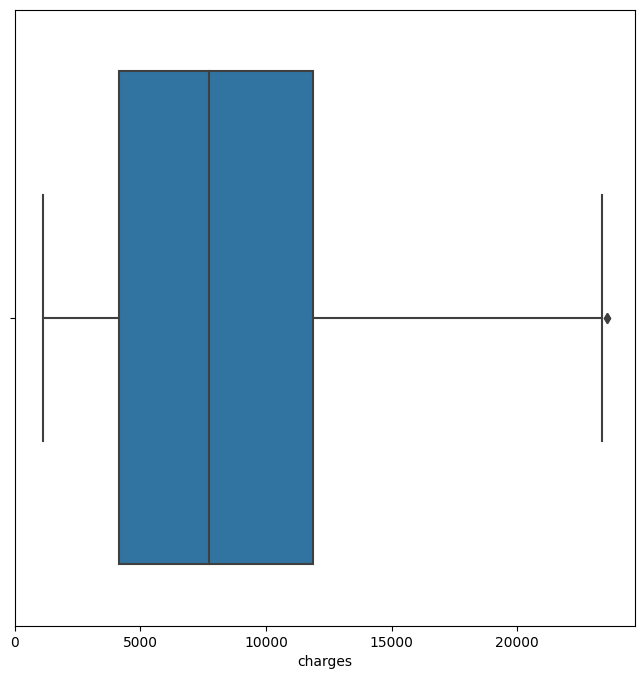

In [ ]:
#Membuat grafik boxplot untuk kolom 'charges' dengan tujuan melihat keberadaan outliers setelah dihapus
plt.figure(figsize=(8,8))
sns.boxplot(x='charges', data=data_no_outliers_4)

In [ ]:
#Akan dicek outliers dari kolom charges
kolom_charges = data_no_outliers_4['charges']

#Akan dihitung mean dan standar deviasi dari kolom charges
mean = kolom_charges.mean()
std_dev = kolom_charges.std()

# Akan dihitung batas atas dan batas bawah outlier menggunakan metode IQR
Q1 = kolom_charges.quantile(0.25)
Q3 = kolom_charges.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_kelima = kolom_charges[(kolom_charges < lower_bound) | (kolom_charges > upper_bound)]

print("Nilai-nilai Outlier:")
print(outliers_kelima)

Nilai-nilai Outlier:
52      23568.27200
1211    23563.01618
Name: charges, dtype: float64


In [ ]:
# Menghitung IQR untuk variabel charges
Q1 = data_no_outliers_4['charges'].quantile(0.25)
Q3 = data_no_outliers_4['charges'].quantile(0.75)
IQR = Q3 - Q1

# Membuat filter untuk menghilangkan outlier
outlier_filter_5 = ((data_no_outliers_4['charges'] < (Q1 - 1.5 * IQR)) | (data_no_outliers_4['charges'] > (Q3 + 1.5 * IQR)))

# Menghilangkan baris yang memiliki outlier
data_no_outliers_5 = data_no_outliers_4[~outlier_filter_5]

<Axes: xlabel='charges'>

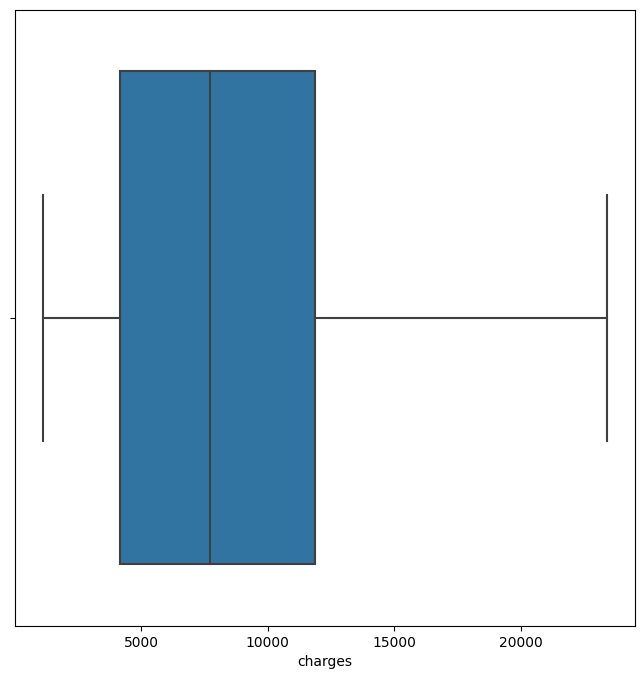

In [ ]:
#Membuat grafik boxplot untuk kolom 'charges' dengan tujuan melihat keberadaan outliers setelah dihapus
plt.figure(figsize=(8,8))
sns.boxplot(x='charges', data=data_no_outliers_5)



*   Bmi



In [ ]:
# Menghitung IQR untuk variabel charges
Q1 = data_no_outliers['bmi'].quantile(0.25)
Q3 = data_no_outliers['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Membuat filter untuk menghilangkan outlier
outlier_filter = ((data_no_outliers['bmi'] < (Q1 - 1.5 * IQR)) | (data_no_outliers['bmi'] > (Q3 + 1.5 * IQR)))

# Menghilangkan baris yang memiliki outlier
data_no_outliers = data_no_outliers[~outlier_filter]

<Axes: xlabel='bmi'>

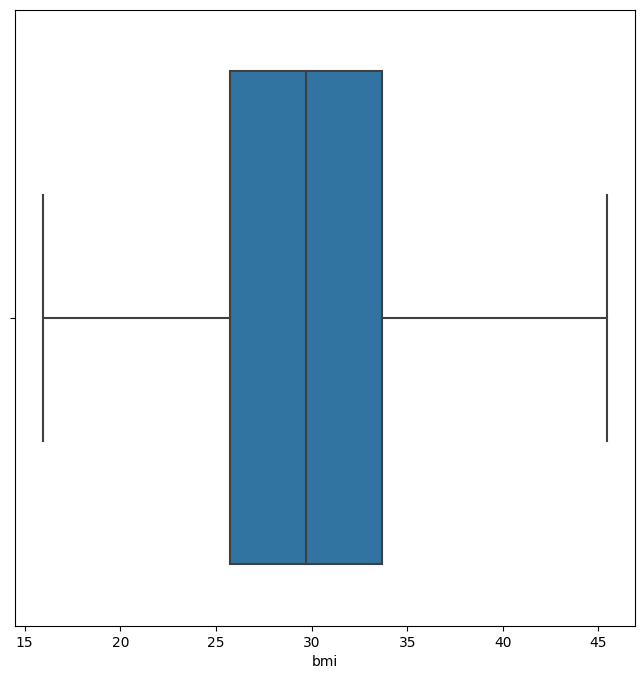

In [ ]:
#Membuat grafik boxplot untuk kolom 'bmi' setelah outlier dihapus
plt.figure(figsize=(8,8))
sns.boxplot(x='bmi', data=data_no_outliers)

In [ ]:
#Melihat jumlah data setelah penghapusan outliers
data_no_outliers_5

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,0rthwest,21984.47061
4,32,male,28.880,0,0,0rthwest,3866.85520
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,0,southwest,11411.68500
1333,50,male,30.970,3,0,0rthwest,10600.54830
1334,18,female,31.920,0,0,0rtheast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350


In [ ]:
data_no_outliers_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1116 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1116 non-null   int64  
 1   sex       1116 non-null   object 
 2   bmi       1116 non-null   float64
 3   children  1116 non-null   int64  
 4   smoker    1116 non-null   int64  
 5   region    1116 non-null   object 
 6   charges   1116 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 69.8+ KB


##Melihat korelasi variabel independen dengan variabel charges


In [ ]:
data_encoded = data_no_outliers_5

In [ ]:
# Mengecek korelasi antar variabel independen terhadap variabel respon
correlation_matrix = data_encoded.corr()
charges_correlation = correlation_matrix['charges'].sort_values(ascending=False)
print("\nCorrelation with charges variable:")
print(charges_correlation)


Correlation with charges variable:
charges     1.000000
smoker      0.569117
age         0.520632
children    0.112928
bmi        -0.064507
Name: charges, dtype: float64


<ipython-input-79-bbf22fd562ed>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_encoded.corr()


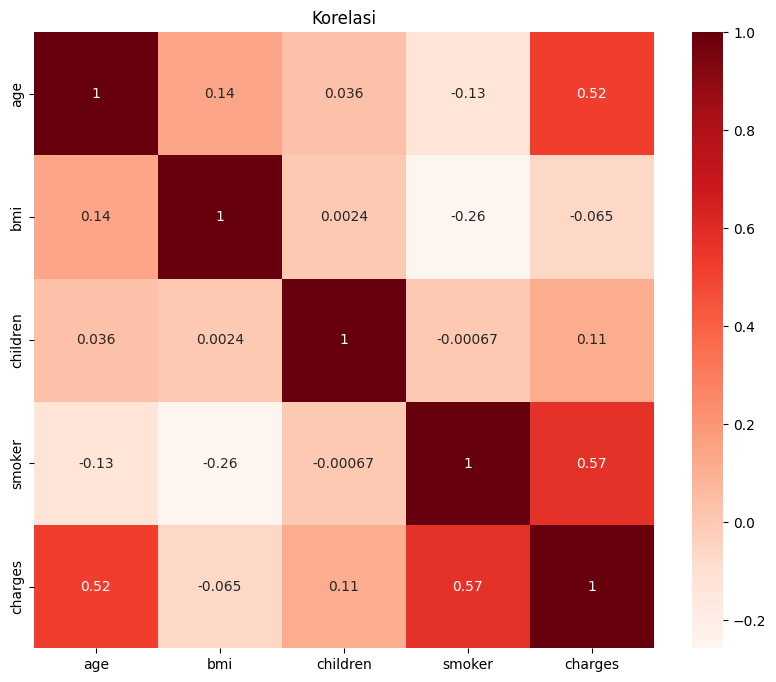

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_encoded.select_dtypes('number').corr(),annot=True,cmap='Reds')
plt.title('Korelasi');

Berdasarkan hasil visualisasi heatmap, terlihat bahwa tidak terdapat multikolinearitas antara variabel independen.

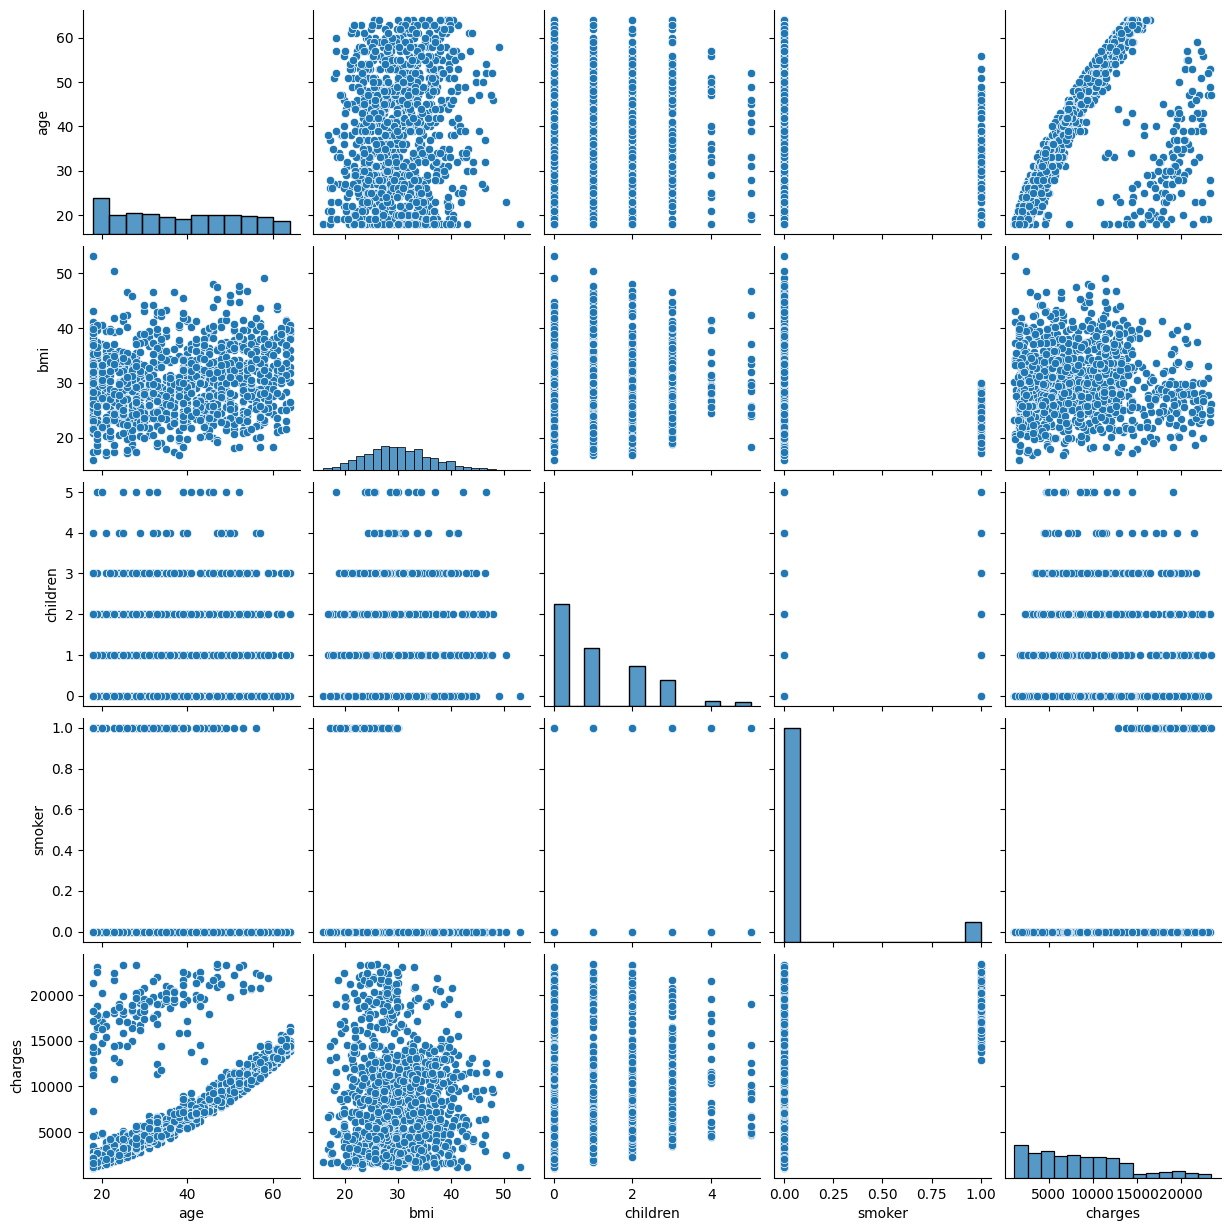

In [ ]:
#Melihat bentuk visualisasi pairplot dari data
sns.pairplot(data_encoded)

<Axes: xlabel='charges', ylabel='Count'>

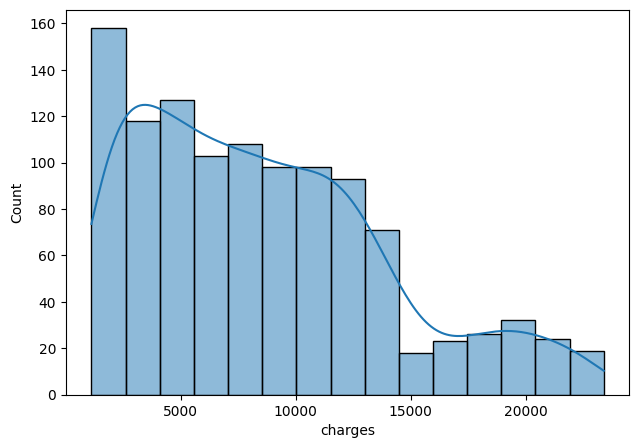

In [ ]:
#Melihat histogram dari kuantitas setiap nilai-nilai 'charges'
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.histplot(data_encoded["charges"], kde=True)

In [ ]:
# Penyimpanan dataset yang telah dilakukan preprocessing
data_encoded.to_csv('data_prepro.csv', index=False)